In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder

In [363]:
train_df = pd.read_csv("C:\\Users\\hp\\Downloads\\train_GzS76OK\\train.csv")
test_df = pd.read_csv("C:\\Users\\hp\\Downloads\\test.csv")
fci_df = pd.read_csv("C:\\Users\\hp\\Downloads\\train_GzS76OK\\fulfilment_center_info.csv")
meal_df = pd.read_csv("C:\\Users\\hp\\Downloads\\train_GzS76OK\\meal_info.csv")

## Data Understanding

In [365]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [366]:
fci_df

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [367]:
meal_df

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


## Data Description

In [373]:
#Here there is two other csv files that give more informations about meal_id and center_id 

In [374]:
import pandas as pd

train = pd.read_csv("C:\\Users\\hp\\Downloads\\train_GzS76OK\\train.csv")
fci = pd.read_csv("C:\\Users\\hp\\Downloads\\train_GzS76OK\\fulfilment_center_info.csv")
meal = pd.read_csv("C:\\Users\\hp\\Downloads\\train_GzS76OK\\meal_info.csv")

train_merged = pd.merge(train, meal, on="meal_id", how="left")


final_train = pd.merge(train_merged, fci, on="center_id", how="left")

final_train.to_csv("final_train.csv", index=False)


In [375]:
test = pd.read_csv("C:\\Users\\hp\\Downloads\\test.csv")
test_merged = pd.merge(test, meal, on="meal_id", how="left")
final_test = pd.merge(test_merged, fci, on="center_id", how="left")
final_test.to_csv("final_test.csv", index=False)

## Load dataset

In [378]:
final_train = pd.read_csv("C:\\Users\\hp\\Downloads\\final_train.csv")
final_test = pd.read_csv("C:\\Users\\hp\\Downloads\\final_test.csv")

In [379]:
final_train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,Desert,Indian,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,Desert,Indian,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,Salad,Italian,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,Salad,Italian,473,77,TYPE_A,4.5


In [380]:
final_test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1127204,146,55,1993,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1212707,146,55,2539,157.14,159.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1082698,146,55,2631,162.02,162.02,0,0,Beverages,Indian,647,56,TYPE_C,2.0
4,1400926,146,55,1248,163.93,163.93,0,0,Beverages,Indian,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0,Desert,Indian,473,77,TYPE_A,4.5
32569,1039516,155,61,2304,483.09,483.09,0,0,Desert,Indian,473,77,TYPE_A,4.5
32570,1158107,155,61,2664,322.07,323.07,0,0,Salad,Italian,473,77,TYPE_A,4.5
32571,1444235,155,61,2569,322.07,323.07,0,0,Salad,Italian,473,77,TYPE_A,4.5


### TRAIN DATA

In [382]:
final_train.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

In [383]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

In [384]:
final_train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [385]:
final_train.isna().sum()  #no null values

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [386]:
final_train.duplicated().sum()   #no duplicated values

0

In [387]:
for col in final_train:
    print(f"Value counts for {col}:\n{final_train[col].value_counts()}\n")

Value counts for id:
id
1379560    1
1201644    1
1199804    1
1321877    1
1320898    1
          ..
1037219    1
1320366    1
1114006    1
1240955    1
1361984    1
Name: count, Length: 456548, dtype: int64

Value counts for week:
week
122    3359
105    3348
106    3347
140    3332
123    3331
       ... 
13     2838
12     2831
14     2830
7      2795
8      2786
Name: count, Length: 145, dtype: int64

Value counts for center_id:
center_id
13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: count, Length: 77, dtype: int64

Value counts for meal_id:
meal_id
2290    11138
1062    11137
1727    11136
1109    11134
1754    11132
2707    11123
1778    11121
1993    11116
1962    11114
1971    11102
1885    11092
2581    11072
2826    11057
2322    11002
1558    10952
1207    10806
2640    10747
1230    10746
1878    10527
2631    10458
2539    10451
1543    10236
2760    10209
1248     9939
2664     98

In [388]:
final_train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [389]:
num_df = final_train.select_dtypes(include="number")
cat_df = final_train.select_dtypes(include="object_")

In [390]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)

cat_cols = cat_df.columns.tolist()
print("Categorical columns are")
print(cat_cols)    #No categorical columns

Numerical columns are
['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code', 'region_code', 'op_area']
Categorical columns are
['category', 'cuisine', 'center_type']


# EXPLORATORY DATA ANALYSIS

### Univariate Analysis

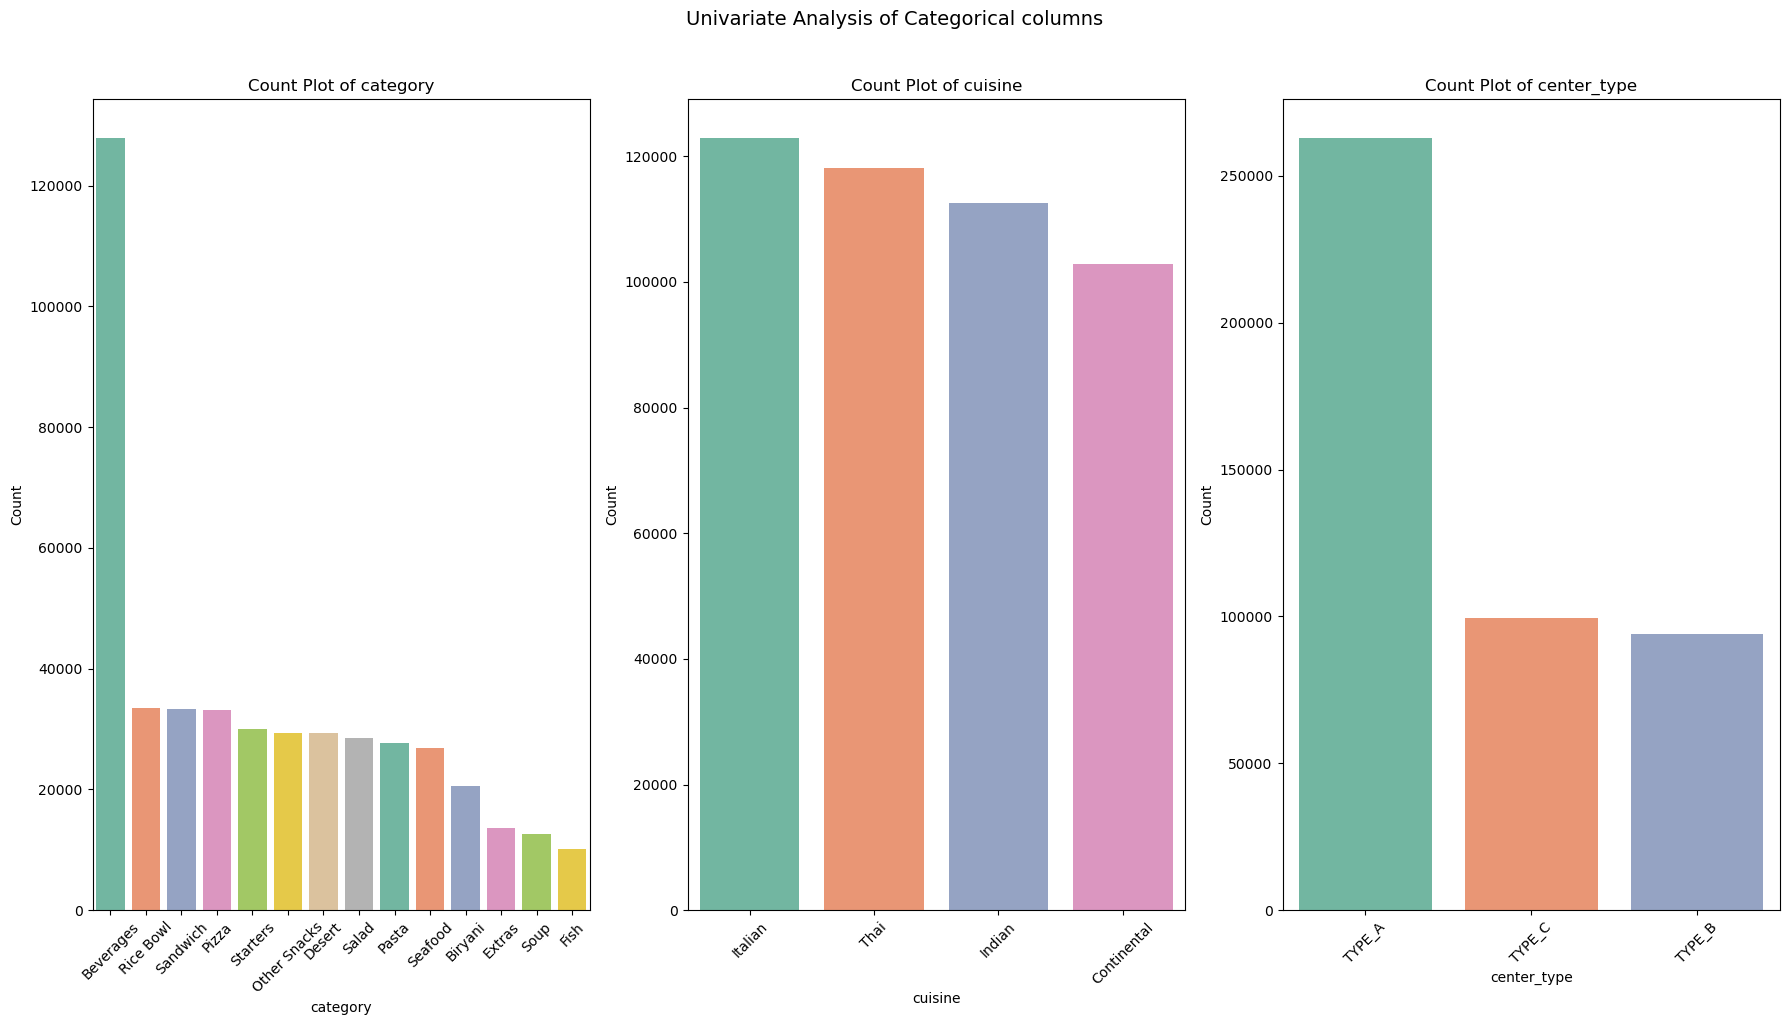

<Figure size 640x480 with 0 Axes>

In [393]:
categorical_columns = ['category','cuisine','center_type']
# subplot
rows = 1
cols = 3
total_plots = len(categorical_columns)


fig, axes = plt.subplots(rows, cols, figsize=(18, 10))
axes = axes.flatten() 


for i, column in enumerate(categorical_columns):
    sns.countplot(data=final_train, x=column, ax=axes[i], palette='Set2', order=final_train[column].value_counts().index)
    axes[i].set_title(f"Count Plot of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)  

fig.suptitle("Univariate Analysis of Categorical columns", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()
plt.savefig("Univariate Analysis.jpg")

### Bivariate analysis

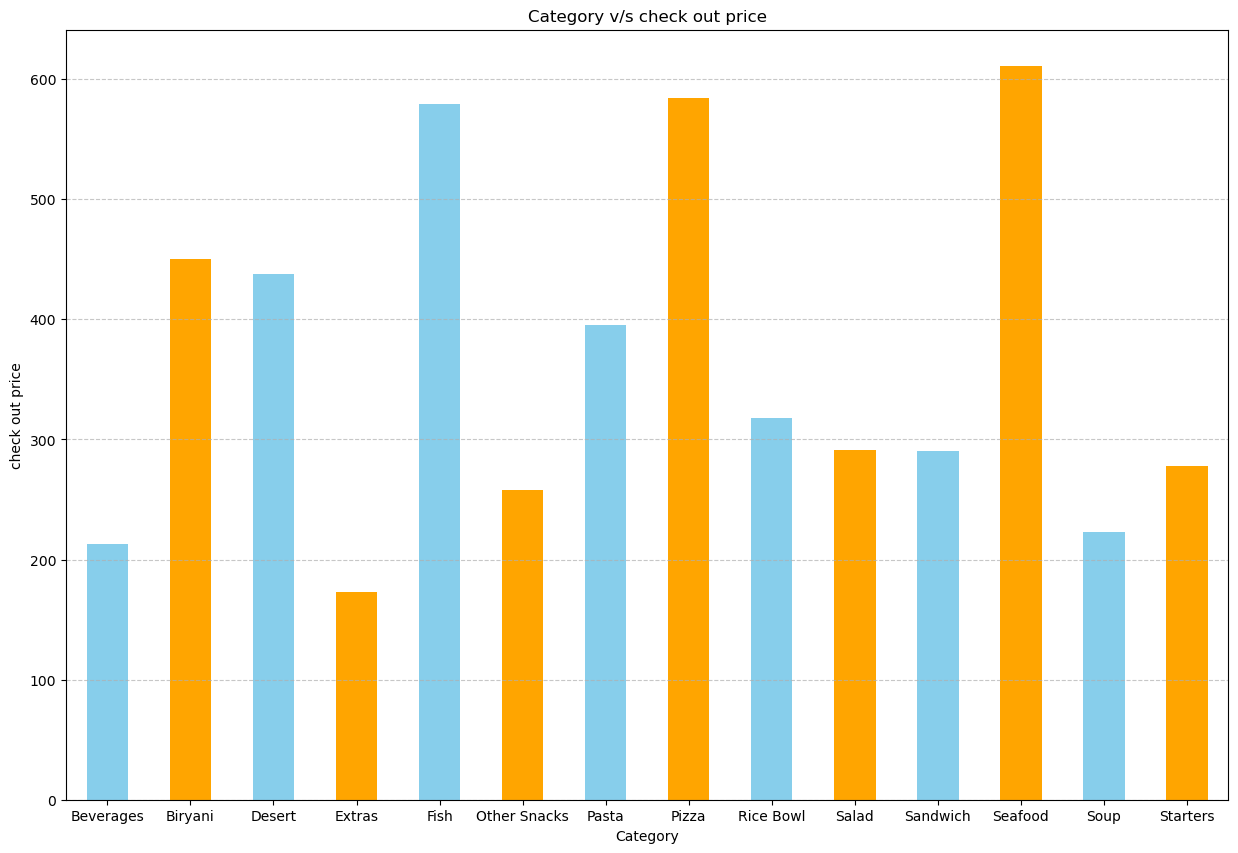

In [395]:
plt.figure(figsize=(15, 10))
Category_by_checkout_price = final_train.groupby('category')['checkout_price'].mean()
Category_by_checkout_price.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Category v/s check out price')
plt.xlabel('Category')
plt.ylabel('check out price')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

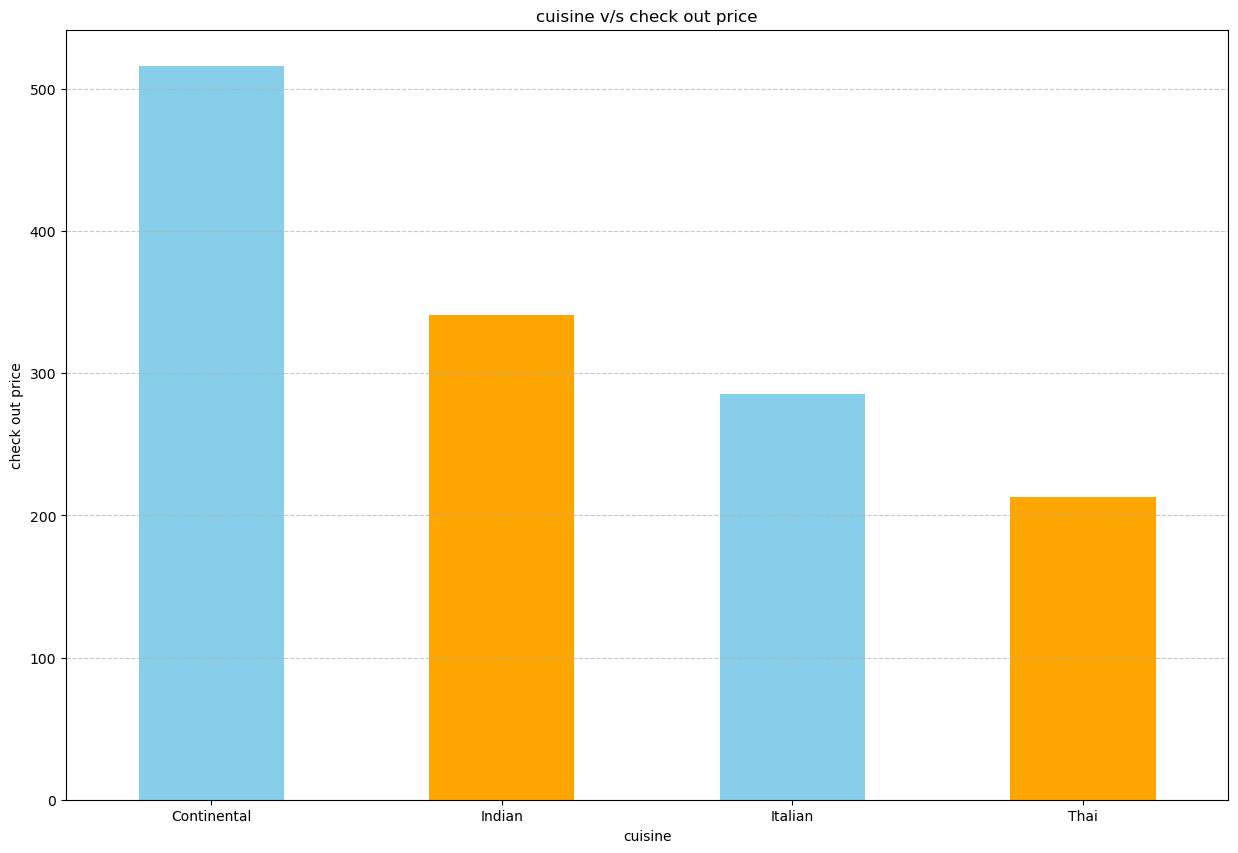

In [396]:
plt.figure(figsize=(15, 10))
Cuisine_by_checkout_price = final_train.groupby('cuisine')['checkout_price'].mean()
Cuisine_by_checkout_price.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('cuisine v/s check out price')
plt.xlabel('cuisine')
plt.ylabel('check out price')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [397]:
# plt.figure(figsize=(15, 10))
# Cuisine_by_categor = final_train.groupby('cuisine')['category'].mean()
# Cuisine_by_checkout_price.plot(kind='bar', color=['skyblue', 'orange'])
# plt.title('cuisine v/s check out price')
# plt.xlabel('cuisine')
# plt.ylabel('check out price')
# plt.xticks(rotation=0)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show() --- NOT RUNNING

### Outlier Detection

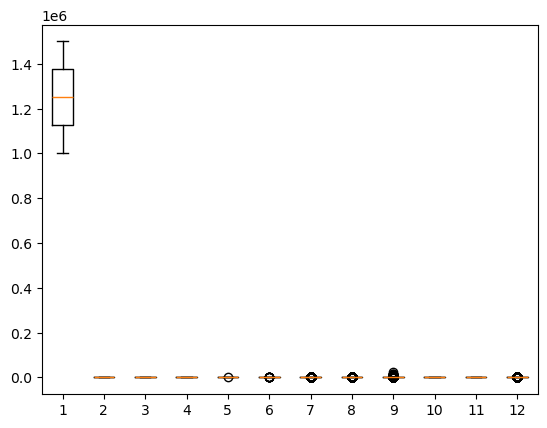

In [399]:
plt.boxplot(num_df)
plt.show()

In [400]:
def remove_outliers(train_df, column_name):
    q1 = train_df[column_name].quantile(0.25)
    q3 = train_df[column_name].quantile(0.75)
    iqr = q3-q1
    upperbound = q3 + 1.5 * iqr
    lowerbound = q1 - 1.5 * iqr
    train_df[column_name] = train_df[column_name].clip(upper=upperbound)
    train_df[column_name] = train_df[column_name].clip(lower=lowerbound)
    return train_df[column_name]
    



In [401]:
for col in num_cols:
    num_df[col] = remove_outliers(num_df,col)


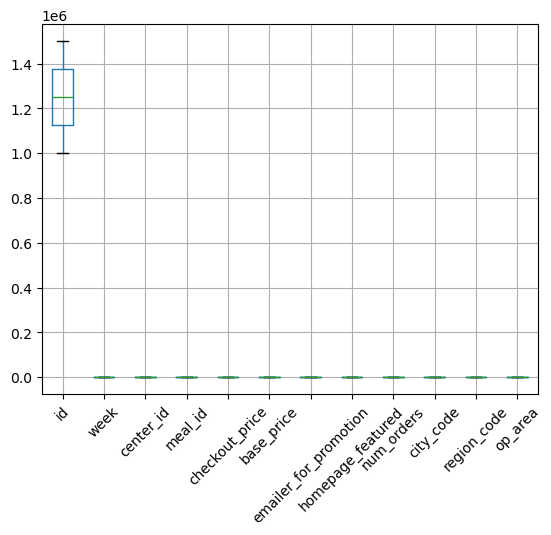

In [402]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [403]:
final_train = pd.concat([num_df, cat_df], axis=1)

### TEST DATA

In [405]:
final_train.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
op_area                  float64
category                  object
cuisine                   object
center_type               object
dtype: object

In [406]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   category               32573 non-null  object 
 9   cuisine                32573 non-null  object 
 10  city_code              32573 non-null  int64  
 11  region_code            32573 non-null  int64  
 12  center_type            32573 non-null  object 
 13  op_area                32573 non-null  float64
dtypes: float64(3), int64(8), object(3)
memory usage: 3.5+ 

In [407]:
final_test.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area
count,3.257300e+04,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000
mean,1.248476e+06,150.477819,81.901728,2032.067909,341.854440,356.493615,0.066435,0.081356,601.519971,56.712154,4.087726
std,1.441580e+05,2.864072,45.950455,547.199004,153.893886,155.150101,0.249045,0.273385,65.996677,17.641174,1.098835
min,1.000085e+06,146.000000,10.000000,1062.000000,67.900000,89.240000,0.000000,0.000000,456.000000,23.000000,0.900000
25%,1.123969e+06,148.000000,43.000000,1558.000000,214.430000,243.500000,0.000000,0.000000,556.000000,34.000000,3.600000
50%,1.247296e+06,150.000000,76.000000,1993.000000,320.130000,321.130000,0.000000,0.000000,596.000000,56.000000,4.000000
75%,1.372971e+06,153.000000,110.000000,2569.000000,446.230000,455.930000,0.000000,0.000000,651.000000,77.000000,4.500000
max,1.499996e+06,155.000000,186.000000,2956.000000,1113.620000,1112.620000,1.000000,1.000000,713.000000,93.000000,7.000000


In [408]:
final_test.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

In [409]:
final_test.duplicated().sum()

0

In [410]:
for col in final_test:
    print(f"Value counts for {col}:\n{final_test[col].value_counts()}\n")

Value counts for id:
id
1028232    1
1018204    1
1426884    1
1232486    1
1175440    1
          ..
1462747    1
1119344    1
1226413    1
1464389    1
1291286    1
Name: count, Length: 32573, dtype: int64

Value counts for week:
week
148    3332
149    3313
150    3277
147    3271
153    3268
152    3242
146    3240
154    3228
151    3224
155    3178
Name: count, dtype: int64

Value counts for center_id:
center_id
13     509
10     508
52     506
174    504
67     499
      ... 
139    321
57     311
162    310
41     299
91     280
Name: count, Length: 77, dtype: int64

Value counts for meal_id:
meal_id
2290    770
2569    770
2664    770
1962    770
1754    770
2826    770
1727    770
1885    769
2490    769
2581    769
1109    769
1971    768
1558    767
1993    767
1062    766
2707    764
1778    762
2539    761
1543    760
1207    758
2322    752
1230    744
2640    735
2704    724
2631    717
2304    715
2760    712
1216    709
1878    709
2139    671
1525    668
1248    660


In [411]:
final_test.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'category', 'cuisine',
       'city_code', 'region_code', 'center_type', 'op_area'],
      dtype='object')

In [412]:
num_df = final_test.select_dtypes(include="number")
cat_df = final_test.select_dtypes(include="object_")

In [413]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)

cat_cols = cat_df.columns.tolist()
print("Categorical columns are")
print(cat_cols)    #No categorical columns

Numerical columns are
['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'city_code', 'region_code', 'op_area']
Categorical columns are
['category', 'cuisine', 'center_type']


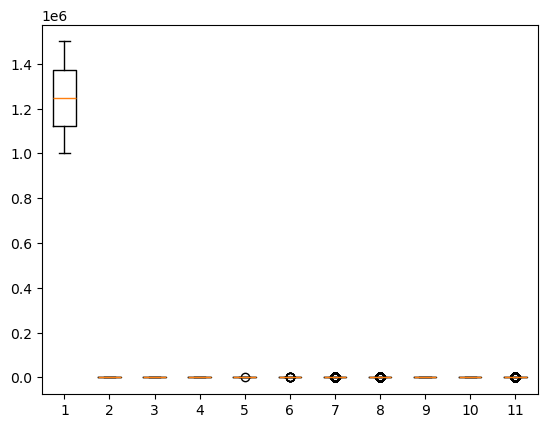

In [414]:
plt.boxplot(num_df)
plt.show()

In [415]:
def remove_outliers(test_df, column_name):
    q1 = test_df[column_name].quantile(0.25)
    q3 = test_df[column_name].quantile(0.75)
    iqr = q3-q1
    upperbound = q3 + 1.5 * iqr
    lowerbound = q1 - 1.5 * iqr
    test_df[column_name] = test_df[column_name].clip(upper=upperbound)
    test_df[column_name] = test_df[column_name].clip(lower=lowerbound)
    return test_df[column_name]
    



In [416]:
for col in num_cols:
    num_df[col] = remove_outliers(num_df,col)


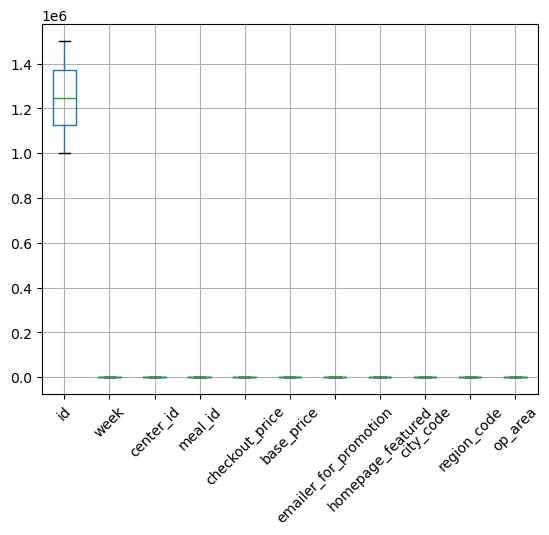

In [417]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [418]:
final_test = pd.concat([num_df, cat_df], axis=1)

# Encoding And Scaling

## Train data

In [420]:
final_train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,category,cuisine,center_type
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2.25,Beverages,Thai,TYPE_C
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,2.25,Beverages,Thai,TYPE_C
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,2.25,Beverages,Thai,TYPE_C
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,2.25,Beverages,Indian,TYPE_C
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,2.25,Beverages,Indian,TYPE_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,4.50,Desert,Indian,TYPE_A
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,4.50,Desert,Indian,TYPE_A
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,4.50,Salad,Italian,TYPE_A
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,4.50,Salad,Italian,TYPE_A


In [421]:
#Since id is not important in prediction, we remove this

ID = final_train["id"]
final_train = final_train.drop(columns=["id"], axis=1)
final_train

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,category,cuisine,center_type
0,1,55,1885,136.83,152.29,0,0,177,647,56,2.25,Beverages,Thai,TYPE_C
1,1,55,1993,136.83,135.83,0,0,270,647,56,2.25,Beverages,Thai,TYPE_C
2,1,55,2539,134.86,135.86,0,0,189,647,56,2.25,Beverages,Thai,TYPE_C
3,1,55,2139,339.50,437.53,0,0,54,647,56,2.25,Beverages,Indian,TYPE_C
4,1,55,2631,243.50,242.50,0,0,40,647,56,2.25,Beverages,Indian,TYPE_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,145,61,1543,484.09,484.09,0,0,68,473,77,4.50,Desert,Indian,TYPE_A
456544,145,61,2304,482.09,482.09,0,0,42,473,77,4.50,Desert,Indian,TYPE_A
456545,145,61,2664,237.68,321.07,0,0,501,473,77,4.50,Salad,Italian,TYPE_A
456546,145,61,2569,243.50,313.34,0,0,729,473,77,4.50,Salad,Italian,TYPE_A


### Label Encoding

In [424]:
#only for targets -- here target is numerical so no need of label encoding

### OneHot Encoding

In [426]:
final_train = pd.get_dummies(final_train,columns=["category"], prefix="cat", dtype=int)
final_train


,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,...,cat_Fish,cat_Other Snacks,cat_Pasta,cat_Pizza,cat_Rice Bowl,cat_Salad,cat_Sandwich,cat_Seafood,cat_Soup,cat_Starters
0,1,55,1885,136.83,152.29,0,0,177,647,56,...,0,0,0,0,0,0,0,0,0,0
1,1,55,1993,136.83,135.83,0,0,270,647,56,...,0,0,0,0,0,0,0,0,0,0
2,1,55,2539,134.86,135.86,0,0,189,647,56,...,0,0,0,0,0,0,0,0,0,0
3,1,55,2139,339.50,437.53,0,0,54,647,56,...,0,0,0,0,0,0,0,0,0,0
4,1,55,2631,243.50,242.50,0,0,40,647,56,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,145,61,1543,484.09,484.09,0,0,68,473,77,...,0,0,0,0,0,0,0,0,0,0
456544,145,61,2304,482.09,482.09,0,0,42,473,77,...,0,0,0,0,0,0,0,0,0,0
456545,145,61,2664,237.68,321.07,0,0,501,473,77,...,0,0,0,0,0,1,0,0,0,0
456546,145,61,2569,243.50,313.34,0,0,729,473,77,...,0,0,0,0,0,1,0,0,0,0


In [428]:
final_train = pd.get_dummies(final_train,columns=["cuisine"], dtype=int)
final_train


,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,...,cat_Rice Bowl,cat_Salad,cat_Sandwich,cat_Seafood,cat_Soup,cat_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1,55,1885,136.83,152.29,0,0,177,647,56,...,0,0,0,0,0,0,0,0,0,1
1,1,55,1993,136.83,135.83,0,0,270,647,56,...,0,0,0,0,0,0,0,0,0,1
2,1,55,2539,134.86,135.86,0,0,189,647,56,...,0,0,0,0,0,0,0,0,0,1
3,1,55,2139,339.50,437.53,0,0,54,647,56,...,0,0,0,0,0,0,0,1,0,0
4,1,55,2631,243.50,242.50,0,0,40,647,56,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,145,61,1543,484.09,484.09,0,0,68,473,77,...,0,0,0,0,0,0,0,1,0,0
456544,145,61,2304,482.09,482.09,0,0,42,473,77,...,0,0,0,0,0,0,0,1,0,0
456545,145,61,2664,237.68,321.07,0,0,501,473,77,...,0,1,0,0,0,0,0,0,1,0
456546,145,61,2569,243.50,313.34,0,0,729,473,77,...,0,1,0,0,0,0,0,0,1,0


In [429]:
final_train = pd.get_dummies(final_train,columns=["center_type"], dtype=int)
final_train


,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,...,cat_Seafood,cat_Soup,cat_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,1,55,1885,136.83,152.29,0,0,177,647,56,...,0,0,0,0,0,0,1,0,0,1
1,1,55,1993,136.83,135.83,0,0,270,647,56,...,0,0,0,0,0,0,1,0,0,1
2,1,55,2539,134.86,135.86,0,0,189,647,56,...,0,0,0,0,0,0,1,0,0,1
3,1,55,2139,339.50,437.53,0,0,54,647,56,...,0,0,0,0,1,0,0,0,0,1
4,1,55,2631,243.50,242.50,0,0,40,647,56,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,145,61,1543,484.09,484.09,0,0,68,473,77,...,0,0,0,0,1,0,0,1,0,0
456544,145,61,2304,482.09,482.09,0,0,42,473,77,...,0,0,0,0,1,0,0,1,0,0
456545,145,61,2664,237.68,321.07,0,0,501,473,77,...,0,0,0,0,0,1,0,1,0,0
456546,145,61,2569,243.50,313.34,0,0,729,473,77,...,0,0,0,0,0,1,0,1,0,0


### MinmaxScaling

In [431]:
minmax_scaler = MinMaxScaler()
final_train["week_sc"] = minmax_scaler.fit_transform(final_train[["week"]])
final_train["center_id_sc"] = minmax_scaler.fit_transform(final_train[["center_id"]])
final_train["checkout_price_sc"] = minmax_scaler.fit_transform(final_train[["checkout_price"]])
final_train["base_price_sc"] = minmax_scaler.fit_transform(final_train[["base_price"]])
final_train["num_orders_sc"] = minmax_scaler.fit_transform(final_train[["num_orders"]])
final_train["city_code_sc"] = minmax_scaler.fit_transform(final_train[["city_code"]])
final_train["region_code_sc"] = minmax_scaler.fit_transform(final_train[["region_code"]])
final_train["op_area_sc"] = minmax_scaler.fit_transform(final_train[["op_area"]])


final_train
final_train = final_train.drop(columns = ["meal_id","week", "center_id", "checkout_price", "base_price", "num_orders", "city_code", "region_code", "op_area"])
final_train

,emailer_for_promotion,homepage_featured,cat_Beverages,cat_Biryani,cat_Desert,cat_Extras,cat_Fish,cat_Other Snacks,cat_Pasta,cat_Pizza,...,center_type_TYPE_B,center_type_TYPE_C,week_sc,center_id_sc,checkout_price_sc,base_price_sc,num_orders_sc,city_code_sc,region_code_sc,op_area_sc
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0.0,0.255682,0.174597,0.133421,0.229050,0.743191,0.471429,0.000
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0.0,0.255682,0.174597,0.110766,0.358939,0.743191,0.471429,0.000
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0.0,0.255682,0.172027,0.110808,0.245810,0.743191,0.471429,0.000
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0.0,0.255682,0.438945,0.526002,0.057263,0.743191,0.471429,0.000
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0.0,0.255682,0.313729,0.257578,0.037709,0.743191,0.471429,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,0,0,0,0,1,0,0,0,0,0,...,0,0,1.0,0.289773,0.627537,0.590084,0.076816,0.066148,0.771429,0.625
456544,0,0,0,0,1,0,0,0,0,0,...,0,0,1.0,0.289773,0.624928,0.587331,0.040503,0.066148,0.771429,0.625
456545,0,0,0,0,0,0,0,0,0,0,...,0,0,1.0,0.289773,0.306138,0.365716,0.681564,0.066148,0.771429,0.625
456546,0,0,0,0,0,0,0,0,0,0,...,0,0,1.0,0.289773,0.313729,0.355077,1.000000,0.066148,0.771429,0.625


### Test DATA

In [477]:
final_test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine,center_type
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,2.25,Beverages,Thai,TYPE_C
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,2.25,Beverages,Thai,TYPE_C
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,2.25,Beverages,Thai,TYPE_C
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,2.25,Beverages,Indian,TYPE_C
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,2.25,Beverages,Indian,TYPE_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0,473,77,4.50,Desert,Indian,TYPE_A
32569,1039516,155,61,2304,483.09,483.09,0,0,473,77,4.50,Desert,Indian,TYPE_A
32570,1158107,155,61,2664,322.07,323.07,0,0,473,77,4.50,Salad,Italian,TYPE_A
32571,1444235,155,61,2569,322.07,323.07,0,0,473,77,4.50,Salad,Italian,TYPE_A


In [479]:
#Since id is not important in prediction, we remove this

ID_test = final_test["id"]
final_test = final_test.drop(columns=["id"], axis=1)
final_test

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,category,cuisine,center_type
0,146,55,1885,158.11,159.11,0,0,647,56,2.25,Beverages,Thai,TYPE_C
1,146,55,1993,160.11,159.11,0,0,647,56,2.25,Beverages,Thai,TYPE_C
2,146,55,2539,157.14,159.14,0,0,647,56,2.25,Beverages,Thai,TYPE_C
3,146,55,2631,162.02,162.02,0,0,647,56,2.25,Beverages,Indian,TYPE_C
4,146,55,1248,163.93,163.93,0,0,647,56,2.25,Beverages,Indian,TYPE_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,155,61,1543,482.09,484.09,0,0,473,77,4.50,Desert,Indian,TYPE_A
32569,155,61,2304,483.09,483.09,0,0,473,77,4.50,Desert,Indian,TYPE_A
32570,155,61,2664,322.07,323.07,0,0,473,77,4.50,Salad,Italian,TYPE_A
32571,155,61,2569,322.07,323.07,0,0,473,77,4.50,Salad,Italian,TYPE_A


In [481]:
#only for targets -- here target is numerical so no need of label encoding

In [485]:
final_test = pd.get_dummies(final_test,columns=["category"], prefix="cat", dtype=int)
final_test


,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,...,cat_Fish,cat_Other Snacks,cat_Pasta,cat_Pizza,cat_Rice Bowl,cat_Salad,cat_Sandwich,cat_Seafood,cat_Soup,cat_Starters
0,146,55,1885,158.11,159.11,0,0,647,56,2.25,...,0,0,0,0,0,0,0,0,0,0
1,146,55,1993,160.11,159.11,0,0,647,56,2.25,...,0,0,0,0,0,0,0,0,0,0
2,146,55,2539,157.14,159.14,0,0,647,56,2.25,...,0,0,0,0,0,0,0,0,0,0
3,146,55,2631,162.02,162.02,0,0,647,56,2.25,...,0,0,0,0,0,0,0,0,0,0
4,146,55,1248,163.93,163.93,0,0,647,56,2.25,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,155,61,1543,482.09,484.09,0,0,473,77,4.50,...,0,0,0,0,0,0,0,0,0,0
32569,155,61,2304,483.09,483.09,0,0,473,77,4.50,...,0,0,0,0,0,0,0,0,0,0
32570,155,61,2664,322.07,323.07,0,0,473,77,4.50,...,0,0,0,0,0,1,0,0,0,0
32571,155,61,2569,322.07,323.07,0,0,473,77,4.50,...,0,0,0,0,0,1,0,0,0,0


In [487]:
final_test = pd.get_dummies(final_test,columns=["cuisine"], dtype=int)
final_test


,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,...,cat_Rice Bowl,cat_Salad,cat_Sandwich,cat_Seafood,cat_Soup,cat_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,146,55,1885,158.11,159.11,0,0,647,56,2.25,...,0,0,0,0,0,0,0,0,0,1
1,146,55,1993,160.11,159.11,0,0,647,56,2.25,...,0,0,0,0,0,0,0,0,0,1
2,146,55,2539,157.14,159.14,0,0,647,56,2.25,...,0,0,0,0,0,0,0,0,0,1
3,146,55,2631,162.02,162.02,0,0,647,56,2.25,...,0,0,0,0,0,0,0,1,0,0
4,146,55,1248,163.93,163.93,0,0,647,56,2.25,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,155,61,1543,482.09,484.09,0,0,473,77,4.50,...,0,0,0,0,0,0,0,1,0,0
32569,155,61,2304,483.09,483.09,0,0,473,77,4.50,...,0,0,0,0,0,0,0,1,0,0
32570,155,61,2664,322.07,323.07,0,0,473,77,4.50,...,0,1,0,0,0,0,0,0,1,0
32571,155,61,2569,322.07,323.07,0,0,473,77,4.50,...,0,1,0,0,0,0,0,0,1,0


In [489]:
final_test = pd.get_dummies(final_test,columns=["center_type"], dtype=int)
final_test


,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,...,cat_Seafood,cat_Soup,cat_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C
0,146,55,1885,158.11,159.11,0,0,647,56,2.25,...,0,0,0,0,0,0,1,0,0,1
1,146,55,1993,160.11,159.11,0,0,647,56,2.25,...,0,0,0,0,0,0,1,0,0,1
2,146,55,2539,157.14,159.14,0,0,647,56,2.25,...,0,0,0,0,0,0,1,0,0,1
3,146,55,2631,162.02,162.02,0,0,647,56,2.25,...,0,0,0,0,1,0,0,0,0,1
4,146,55,1248,163.93,163.93,0,0,647,56,2.25,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,155,61,1543,482.09,484.09,0,0,473,77,4.50,...,0,0,0,0,1,0,0,1,0,0
32569,155,61,2304,483.09,483.09,0,0,473,77,4.50,...,0,0,0,0,1,0,0,1,0,0
32570,155,61,2664,322.07,323.07,0,0,473,77,4.50,...,0,0,0,0,0,1,0,1,0,0
32571,155,61,2569,322.07,323.07,0,0,473,77,4.50,...,0,0,0,0,0,1,0,1,0,0


In [495]:
minmax_scaler = MinMaxScaler()
final_test["week_sc"] = minmax_scaler.fit_transform(final_test[["week"]])
final_test["center_id_sc"] = minmax_scaler.fit_transform(final_test[["center_id"]])
final_test["checkout_price_sc"] = minmax_scaler.fit_transform(final_test[["checkout_price"]])
final_test["base_price_sc"] = minmax_scaler.fit_transform(final_test[["base_price"]])
# final_test["num_orders_sc"] = minmax_scaler.fit_transform(final_test[["num_orders"]])
final_test["city_code_sc"] = minmax_scaler.fit_transform(final_test[["city_code"]])
final_test["region_code_sc"] = minmax_scaler.fit_transform(final_test[["region_code"]])
final_test["op_area_sc"] = minmax_scaler.fit_transform(final_test[["op_area"]])


final_test
final_test = final_test.drop(columns = ["meal_id","week", "center_id", "checkout_price", "base_price","city_code", "region_code", "op_area"])
final_test

,emailer_for_promotion,homepage_featured,cat_Beverages,cat_Biryani,cat_Desert,cat_Extras,cat_Fish,cat_Other Snacks,cat_Pasta,cat_Pizza,...,center_type_TYPE_A,center_type_TYPE_B,center_type_TYPE_C,week_sc,center_id_sc,checkout_price_sc,base_price_sc,city_code_sc,region_code_sc,op_area_sc
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0.0,0.255682,0.124251,0.101950,0.743191,0.471429,0.000
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0.0,0.255682,0.127006,0.101950,0.743191,0.471429,0.000
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0.0,0.255682,0.122915,0.101994,0.743191,0.471429,0.000
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0.0,0.255682,0.129637,0.106196,0.743191,0.471429,0.000
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0.0,0.255682,0.132267,0.108983,0.743191,0.471429,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1.0,0.289773,0.570486,0.576142,0.066148,0.771429,0.625
32569,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1.0,0.289773,0.571863,0.574682,0.066148,0.771429,0.625
32570,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1.0,0.289773,0.350082,0.341191,0.066148,0.771429,0.625
32571,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1.0,0.289773,0.350082,0.341191,0.066148,0.771429,0.625


# Model Testing

In [500]:
X_train = final_train.drop(["num_orders_sc"], axis=1)
y_train = final_train["num_orders_sc"]
X_test = final_test.copy()

In [502]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [504]:
print(lr_model.coef_)
print(lr_model.intercept_)

[ 3.54536900e+05 -4.89989152e+10 -1.06871663e+08 -1.06871663e+08
 -1.06871663e+08 -1.06871663e+08 -1.06871663e+08 -1.06871663e+08
 -1.06871663e+08 -1.06871663e+08 -1.06871662e+08 -1.06871663e+08
 -1.06871663e+08 -1.06871663e+08 -1.06871664e+08 -1.06871663e+08
 -1.28128050e+09 -1.28128050e+09 -1.28128050e+09 -1.28128050e+09
  8.58492633e+09  8.58492633e+09  8.58492633e+09 -1.02405548e-02
 -5.82265854e-02 -1.19132900e+00  7.17628479e-01  3.56702805e-02
  3.80449891e-02  2.65827179e-01]
-7196774158.131261


In [506]:
y_test_pred_lr_model = lr_model.predict(X_test)

In [508]:
# print(y_test_pred[:150])
print("Predictions by linear Regression model:",y_test_pred_lr_model)
#first 150 predictions 

Predictions by linear Regression model: [0.48343945 0.48015785 0.4850626  ... 0.53479671 0.53479671 0.56083775]


In [ ]:
mse=mean_squared_error(y_train,y_test_pred_lr_model)
r2=r2_score(y_train,y_test_pred_lr_model)
mae=mean_absolute_error(y_train,y_test_pred_lr_model)

In [514]:
model=LinearRegression()
model.fit(x1_test,y1_test)
predicted_chol=model.predict(x1_test)

Test target values (y_test) are not available.


In [ ]:
mse=mean_squared_error(y1_test,predicted_chol)
r2=r2_score(y1_test,predicted_chol)
mae=mean_absolute_error(y1_test,predicted_chol)


In [ ]:
# from sklearn.linear_model import LinearRegression

# model = LinearRegression()
# model.fit(X, y)
# y_pred = model.predict(X_new)